https://qiskit.org/learn

https://learning.quantum-computing.ibm.com/

# Basic

Qiskit is an open-source framework for quantum computing developed by IBM. It provides a set of tools and libraries for working with quantum computers and quantum circuits. Qiskit allows researchers to write, compile, and execute quantum programs on IBM's quantum processors, as well as on simulators.

In [1]:
#https://qiskit.org/documentation/tutorials/circuits/1_getting_started_with_qiskit.html
#https://docs.quantum-computing.ibm.com/

In [2]:
from qiskit.visualization import array_to_latex
from qiskit.quantum_info import Statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import HGate, CXGate
from qiskit import QuantumCircuit

import numpy as np

In [3]:
ket_psi = np.array([[0],[1.j]])
ket_psi

array([[0.+0.j],
       [0.+1.j]])

In [4]:
array_to_latex(ket_psi)

<IPython.core.display.Latex object>

In [5]:
bra_phi = np.multiply(1/np.sqrt(2),[[1,1]])
array_to_latex(bra_phi)

<IPython.core.display.Latex object>

In [6]:
bra_psi = ket_psi.conj().T
array_to_latex(bra_psi)

<IPython.core.display.Latex object>

In [7]:
ket_phi = bra_phi.conj().T
array_to_latex(ket_phi)

<IPython.core.display.Latex object>

In [8]:
array_to_latex(
    np.dot(bra_phi,ket_psi)
    )

<IPython.core.display.Latex object>

In [9]:
array_to_latex(
    np.dot(ket_phi,bra_psi)
    )

<IPython.core.display.Latex object>

In [10]:
array_to_latex(
    np.outer(ket_phi,ket_psi)
    )

<IPython.core.display.Latex object>

In [11]:
ket_zero = np.array([[1],[0]])
ket_one = np.array([[0],[1]])
bra_zero = ket_zero.conj().T
array_to_latex(
    np.outer(ket_zero,bra_zero)
    )

<IPython.core.display.Latex object>

In [12]:
array_to_latex(
    np.dot(bra_zero,ket_zero)
    )

<IPython.core.display.Latex object>

In [13]:
array_to_latex(
    np.kron(ket_zero,ket_zero)
    )

<IPython.core.display.Latex object>

In [14]:
array_to_latex(
    np.kron(ket_phi,ket_zero)
    )

<IPython.core.display.Latex object>

In [15]:
H=np.multiply(1/np.sqrt(2),np.array([[1, 1],[1,-1]]))
array_to_latex(H)

<IPython.core.display.Latex object>

In [16]:
array_to_latex(
    H@ket_zero
)

<IPython.core.display.Latex object>

In [17]:
# now use statevector
sv_ket_psi = Statevector(ket_psi)
sv_ket_psi.draw('latex')

<IPython.core.display.Latex object>

In [18]:
sv_H_ket_zero = Statevector(H@ket_zero)
sv_H_ket_zero.draw('latex')

<IPython.core.display.Latex object>

In [19]:
H_2 = np.kron(H,H)
ket_H_2_phi_psi = Statevector(H_2@np.kron(ket_phi,ket_psi))
ket_H_2_phi_psi.draw('latex')

<IPython.core.display.Latex object>

In [20]:
ket_H_2_phi_psi.is_valid()

True

In [21]:
ket_H_2_phi_psi.probabilities()

array([5.00000000e-01, 5.00000000e-01, 5.28699741e-34, 5.28699741e-34])

In [22]:
ket_H_2_phi_psi.probabilities_dict()

{'00': 0.4999999999999998,
 '01': 0.4999999999999998,
 '10': 5.286997409534849e-34,
 '11': 5.286997409534849e-34}

In [23]:
#Operator

op_H = Operator(H)
array_to_latex(op_H)


<IPython.core.display.Latex object>

An operator is unitary if: $ UU^{\dagger} = \mathbb{1} = U^{\dagger} U$

In [24]:
op_H.is_unitary()

True

In [25]:
H_gate = HGate()
type(H_gate)

qiskit.circuit.library.standard_gates.h.HGate

In [26]:
cnot = CXGate()
cnot

Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])

In [27]:
array_to_latex(cnot)

<IPython.core.display.Latex object>

In [28]:
op_cnot = Operator(cnot)
array_to_latex(
    op_cnot.power(2)
)

<IPython.core.display.Latex object>

In [29]:
pauli_x = Pauli('X')

array_to_latex(pauli_x)

<IPython.core.display.Latex object>

In [30]:
pauli_y = Pauli('Y')

array_to_latex(pauli_y)

<IPython.core.display.Latex object>

In [31]:
pauli_z = Pauli('Z')

array_to_latex(pauli_z)

<IPython.core.display.Latex object>

# Circuits

In [32]:
bell_circuit = QuantumCircuit(2)

bell_circuit.h(0) # apply an H gate to the circuit
bell_circuit.cx(0,1) # apply a CNOT gate to the circuit

bell_circuit.draw()

┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

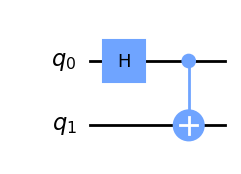

In [33]:
bell_circuit.draw("mpl")

In [34]:
op_bell = Operator(bell_circuit)

array_to_latex(op_bell)

<IPython.core.display.Latex object>

In [35]:
ket_00 = np.kron(ket_zero,ket_zero)
ket_01 = np.kron(ket_zero,ket_one)
ket_10 = np.kron(ket_one,ket_zero)
ket_11 = np.kron(ket_one,ket_one)

In [36]:
bell_00 = Statevector(op_bell@ket_00)

bell_00.draw('latex')

<IPython.core.display.Latex object>

In [37]:
bell_00.probabilities_dict()

{'00': 0.4999999999999999, '11': 0.4999999999999999}

In [38]:
bell_00.measure()

('00',
 Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
             dims=(2, 2)))

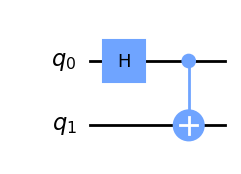

In [39]:
bell_circuit.draw("mpl")

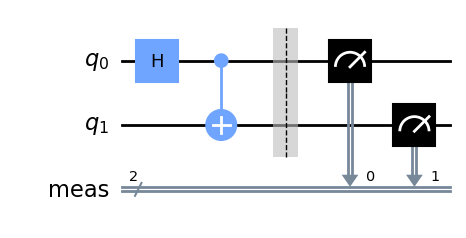

In [40]:
bell_circuit.measure_all()
bell_circuit.draw("mpl")

In [41]:

from qiskit import Aer

In [42]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_statevector_gpu'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_density_matrix_gpu'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_unitary_gpu'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

In [43]:
backend = Aer.get_backend('statevector_simulator')

In [44]:
job = backend.run(bell_circuit)

In [45]:
result=job.result()
result

Result(backend_name='statevector_simulator', backend_version='0.11.2', qobj_id='96bcc640-43ac-44e4-b6e7-39b839905f09', job_id='e24bb628-1fe5-494f-ab8c-6a4842230d8c', success=True, results=[ExperimentResult(shots=1, success=True, meas_level=2, data=ExperimentResultData(counts={'0x0': 1}, statevector=Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))), header=QobjExperimentHeader(clbit_labels=[['meas', 0], ['meas', 1]], creg_sizes=[['meas', 2]], global_phase=0.0, memory_slots=2, metadata={}, n_qubits=2, name='circuit-114', qreg_sizes=[['q', 2]], qubit_labels=[['q', 0], ['q', 1]]), status=DONE, seed_simulator=2491085234, metadata={'noise': 'ideal', 'batched_shots_optimization': False, 'measure_sampling': False, 'parallel_shots': 1, 'remapped_qubits': False, 'active_input_qubits': [0, 1], 'num_clbits': 2, 'parallel_state_update': 20, 'num_qubits': 2, 'device': 'CPU', 'input_qubit_map': [[1, 1], [0, 0]], 'method': 'statevector', 'result_types': {'statevector': 'save_stat

In [46]:
outputstate=result.get_statevector()
outputstate

Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


In [47]:
#plot the real and imaginary components of the state density matrix

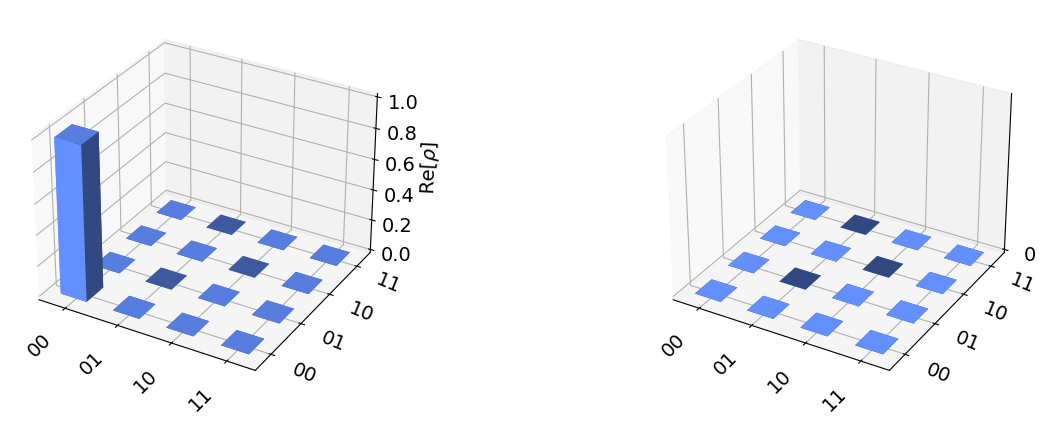

In [48]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [49]:
from qiskit.primitives import Sampler
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [50]:
sampler = Sampler()
job_1 = sampler.run(bell_circuit)
job_1.result()

SamplerResult(quasi_dists=[{0: 0.4999999999999999, 3: 0.4999999999999999}], metadata=[{}])

In [51]:
job_1.result().quasi_dists

[{0: 0.4999999999999999, 3: 0.4999999999999999}]

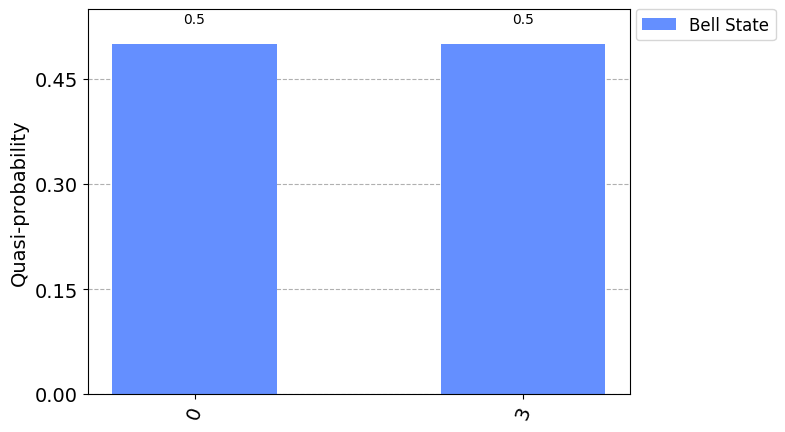

In [52]:
legend = ["Bell State"]
quasi_distr = job_1.result().quasi_dists[0]
plot_histogram(quasi_distr, legend=legend)

# Phase Kickback

A query gate is defined by:

$$U_f|b\rangle|a\rangle=|b\oplus f(a)\rangle|a\rangle$$

where $a,b \in \{0,1\}$.
Using the expression


$$|b\oplus r\rangle=X^r|b\rangle$$

The action of a generic query gate can be expressed as:

$$U_f|\psi\rangle|a\rangle=X^{f(a)}|\psi\rangle|a\rangle$$

If $|\psi\rangle=|-\rangle$ something interesting happens since the minus state is the eigenstate of $X$ gate:

$$U_f|-\rangle|a\rangle=(-1)^{f(a)}|-\rangle|a\rangle$$

In other words, the phase of the new state, encodes some information, in particular the value $f(a)$.

In [53]:
from qiskit.circuit import ClassicalRegister, QuantumRegister, Parameter

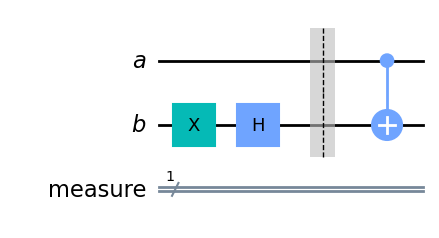

In [54]:
qra = QuantumRegister(1, 'a')
qrb = QuantumRegister(1, 'b')
clr = ClassicalRegister(1,'measure')
phase_kb = QuantumCircuit()
phase_kb.add_register(qra,qrb,clr)

phase_kb.x(1)
phase_kb.h(1)

phase_kb.barrier()

# U_f = CX      f(0)=0 ; f(1)=1
phase_kb.cx(0,1)


phase_kb.draw('mpl')

In [55]:
Statevector(phase_kb).draw('latex')

<IPython.core.display.Latex object>

Another example of phase kickback is the following (remember: controlled gate + eigenstate of unitary U).

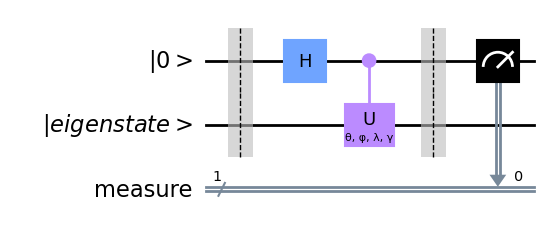

In [56]:
qra = QuantumRegister(1, '|0>')
qrb = QuantumRegister(1, '|eigenstate>')
clr = ClassicalRegister(1,'measure')

phase_kb_exe = QuantumCircuit()
phase_kb_exe.add_register(qra,qrb,clr)


phase_kb_exe.barrier()

phase_kb_exe.h(0)

# U_f = CX      f(0)=0 ; f(1)=1

theta = Parameter('θ')
phi = Parameter('φ')
lam = Parameter('λ')
gamma = Parameter('γ')


phase_kb_exe.cu(theta,phi,lam,gamma,0,1)

phase_kb_exe.barrier()

phase_kb_exe.measure(0,0)

phase_kb_exe.draw('mpl')

$$U(I\otimes H)|eig\rangle|0\rangle = |eig\rangle\frac{|0\rangle+\exp{i2\pi\theta}|1\rangle}{\sqrt{2}} $$

The effect of this circuit is to encode the phase of the eigenvalue of the operator $U$, relative to the eigenstate $|eig\rangle$, on the $|1\rangle$ component of the first qubit (relative phase). Remember that since $U$ is unitary, each eigenvalue will be of the form $\exp(i 2 \pi \theta)$.

# Deutsch algorithm

This query algorithm solves the parity problem for functions $f:\{0,1\} \to \{0,1\}$, which are constant or balanced:
- constant: return always 0 or always 1;
- balanced: return 0 for half of the possible inputs, 1 for the other half.

Remember the definition of a query gate:
$$U_f|b\rangle|a\rangle=|b\oplus f(a)\rangle|a\rangle$$

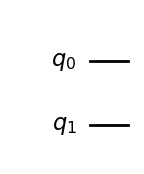

In [57]:
const_0 = QuantumCircuit(2)
gate_const_0 = const_0.to_gate()
gate_const_0.label = "const_0"
const_0.draw('mpl')

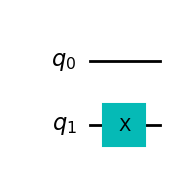

In [58]:
const_1 = QuantumCircuit(2)
const_1.x(1)
gate_const_1 = const_1.to_gate()
gate_const_1.label = "const_1"
const_1.draw('mpl')

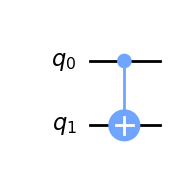

In [59]:
balanced_a = QuantumCircuit(2)
balanced_a.cnot(0,1)
gate_balanced_a = balanced_a.to_gate()
gate_balanced_a.label = "balanced_a"
balanced_a.draw('mpl')

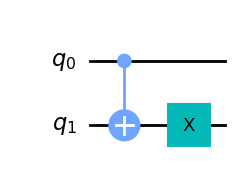

In [60]:
balanced_b = QuantumCircuit(2)
balanced_b.cnot(0,1)
balanced_b.x(1)
gate_balanced_b = balanced_b.to_gate()
gate_balanced_b.label = "balanced_b"
balanced_b.draw('mpl')

In [61]:
import random as rd

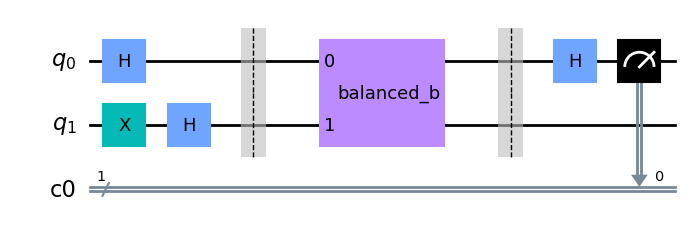

In [62]:
deutsch_circ = QuantumCircuit(2)

deutsch_circ.x(1)
deutsch_circ.h([0,1])

deutsch_circ.barrier()

oracles = [gate_const_0, gate_const_1, gate_balanced_a, gate_balanced_b]
deutsch_circ.append(rd.choice(oracles), [0,1])

deutsch_circ.barrier()

deutsch_circ.h(0)
clr = ClassicalRegister(1)
deutsch_circ.add_register(clr)
deutsch_circ.measure(0,0)

deutsch_circ.draw('mpl')

At the first barrier, the state $|S_1\rangle$ of the circuit is:

$$|S_1\rangle=|-\rangle|+\rangle=\frac{1}{2}(|0\rangle-|1\rangle)|0\rangle+\frac{1}{2}(|0\rangle-|1\rangle)|1\rangle$$

At the second barrier,the state $|S_2\rangle$ of the circuit is:

$$|S_2\rangle=\frac{1}{2}(|0\oplus f(0)\rangle-|1\oplus f(0)\rangle)|0\rangle+\frac{1}{2}(|0\oplus f(1)\rangle-|1\oplus f(1)\rangle)|1\rangle$$

that can be rewritten as:

$$|S_2\rangle= \frac{1}{\sqrt{2}} |-\rangle \left[(-1)^{f(0)}|0\rangle +(-1)^{f(1)}|1\rangle\right]$$


$$|S_2\rangle= (-1)^{f(0)} |-\rangle \frac{|0\rangle +(-1)^{f(0)\oplus f(1)}|1\rangle}{\sqrt{2}}=\begin{cases} (-1)^{f(0)} |-\rangle |+\rangle \qquad if \qquad f(0)\oplus f(1)=0 \\  (-1)^{f(0)}|-\rangle|-\rangle  \qquad if \qquad f(0)\oplus f(1)=1\end{cases}$$

Afterward, the last Hadamard is just a change of basis (to $\hat{x}$) to discriminate between the $|+\rangle$ and $|-\rangle$ state.

In [63]:
# run circuit: if 0 is measured f is constant, else is balanced

sampler = Sampler()
job_deutsch= sampler.run(deutsch_circ)
job_deutsch.result().quasi_dists 

[{1: 0.9999999999999996}]

# Deutsch-Jozsa algorithm

This is the extension of theprevious algorithm, as it works in input functions from $n$ bit to one bit. 

In [64]:
from qiskit.circuit.library import AND

In [65]:
def construct_oracle(n, mode='constant_0', one_inputs=[]):

    assert mode=='constant_0' or mode=='constant_1' or mode=='balanced'

    if mode == 'constant_0':
        circ=QuantumCircuit(n+1)
        oracle = circ.to_gate()
        oracle.label = 'constant_0'
        return oracle
    
    if mode == 'constant_1':
        circ=QuantumCircuit(n+1)
        circ.x(n)
        oracle = circ.to_gate()
        oracle.label = 'constant_1'
        return oracle
    
    if mode=='balanced':
        if one_inputs==[]:
            one_inputs=np.random.choice(range(2**n),2**(n-1),replace=False)
            print(one_inputs)
        else:
            l=len(one_inputs)
            assert l==2**(n-1)
            assert l==len(set(one_inputs))

        circ=QuantumCircuit(n+1)

        for a in one_inputs:
            flag = bin(a)[2:]
            flag = [-1 if b=='0' else 1 for b in flag]
            and_gate = AND(n,flags=flag)
            circ.append(and_gate, range(n+1))
        
        circ.draw('mpl')
        oracle = circ.decompose().to_gate()
        oracle.label = 'balanced'
        return oracle

    

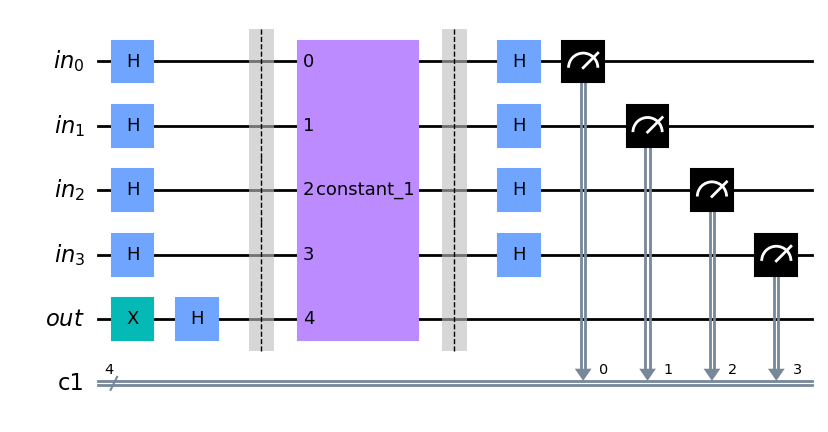

In [66]:
n=4

dj_circ = QuantumCircuit()
in_reg = QuantumRegister(n, 'in')
out_reg = QuantumRegister(1, 'out')
clr = ClassicalRegister(n)
dj_circ.add_register(in_reg,out_reg,clr)

dj_circ.x(n)
dj_circ.h(range(n+1))

dj_circ.barrier()

#example_4_qubit=[ 8,  7, 10,  2, 12, 13,  9,  1]
#oracle=construct_oracle(4, mode='balanced', one_inputs=example_4_qubit)

oracle=construct_oracle(n, mode='constant_1') #'constant_0' or 'constant_1' or 'balanced'
dj_circ.append(oracle, range(n+1))

dj_circ.barrier()

dj_circ.h(range(n))
dj_circ.measure(in_reg,clr)

dj_circ.draw('mpl')
#dj_circ.decompose().draw('mpl')

The postprocessing is classic, since each measurement must be 0 to have a balanced function.

In [67]:
sampler = Sampler()
job_dj= sampler.run(dj_circ, shots=100)
job_dj.result().quasi_dists 

[{0: 1.0}]